In [4]:
%matplotlib inline

In [5]:
# calculate time for earth to fall into sun...
from math import sqrt
from time import time

# physical constants/values
G = 6.67384e-11 # gravitational constant
MS = 1.98855e30 # mass of sun
esd = 149597870700.0 # earth-sun distance in meters

# program variables
n = 1000000
myconst1 = (G*MS*n*n)/(esd*esd)
myconst2 = esd/n

def getA(k):
    """ acceleration at distance (esd*k/n) from sun"""
    ak = myconst1/pow(n-k,2)
    return ak

def getV(v, a, t):
    """ velocity at distance (esd*k/n) from sun"""
    vk = v + a*t
    return vk

def getVAT(k, vold, aold, told):
    """ time to get from position (esd*k/n) to (esd*(k+1)/n)"""
    vk = getV(vold, aold, told)
    ak = getA(k)

    tk = (sqrt(vk*vk + 2*ak*myconst2) - vk)/ak
    return vk, ak, tk

stime = time()
sts, v, a, t = 0, 0, 0, 0
plotValues = []
for x in range(n):
    v, a, t = getVAT(x, v, a, t)
    sts += t
    if x % 5000 == 0:
        plotValues.append((sts, n - x))
plotValues.append((sts, n-x-1))

print "Travel time = %.2f seconds\nDays = %5.3f"%(sts, sts/(60.0*60*24))
print "Computation time = %5.4f seconds"%(time() - stime)


Travel time = 5578753.47 seconds
Days = 64.569
Computation time = 1.8074 seconds


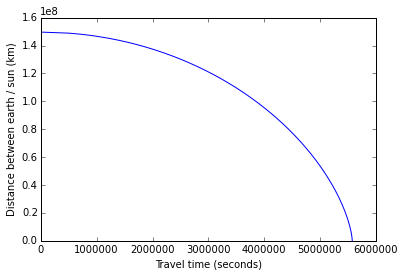

In [6]:
import matplotlib.pyplot as plt
xvals = [sts for sts, x in plotValues]
yvals = [149.597870*x for sts, x in plotValues]
plt.xlabel("Travel time (seconds)")
plt.ylabel("Distance between earth / sun (km)")
plt.plot(xvals, yvals)